In [8]:
!pip install matplotlib
!pip install numpy
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


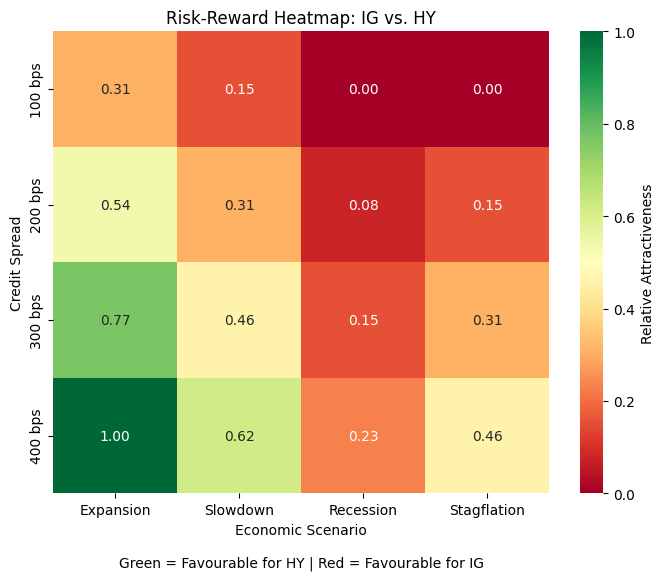

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample economic scenarios and credit spreads
scenarios = ["Expansion", "Slowdown", "Recession", "Stagflation"]
credit_spreads = [100, 200, 300, 400]  # In basis points

# Calculate relative attractiveness (arbitrary function for POC)
# Higher spread favors HY; lower spread + poor economy favors IG
data = []
for spread in credit_spreads:
    row = []
    for scenario in scenarios:
        if scenario == "Expansion":
            row.append(1.5 * spread - 50)  # HY favorable
        elif scenario == "Slowdown":
            row.append(spread - 100)  # Balanced
        elif scenario == "Recession":
            row.append(0.5 * spread - 150)  # IG favorable
        elif scenario == "Stagflation":
            row.append(spread - 200)  # Mixed
    data.append(row)

# Normalize data for heatmap visualization
data = np.array(data)
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    normalized_data,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    xticklabels=scenarios,
    yticklabels=[f"{spread} bps" for spread in credit_spreads],
    cbar_kws={'label': 'Relative Attractiveness'}
)

plt.title("Risk-Reward Heatmap: IG vs. HY")
plt.text(0.5, -0.15, "Green = Favourable for HY | Red = Favourable for IG",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel("Economic Scenario")
plt.ylabel("Credit Spread")
plt.savefig("risk_reward_heatmap_simple.png")
plt.show()

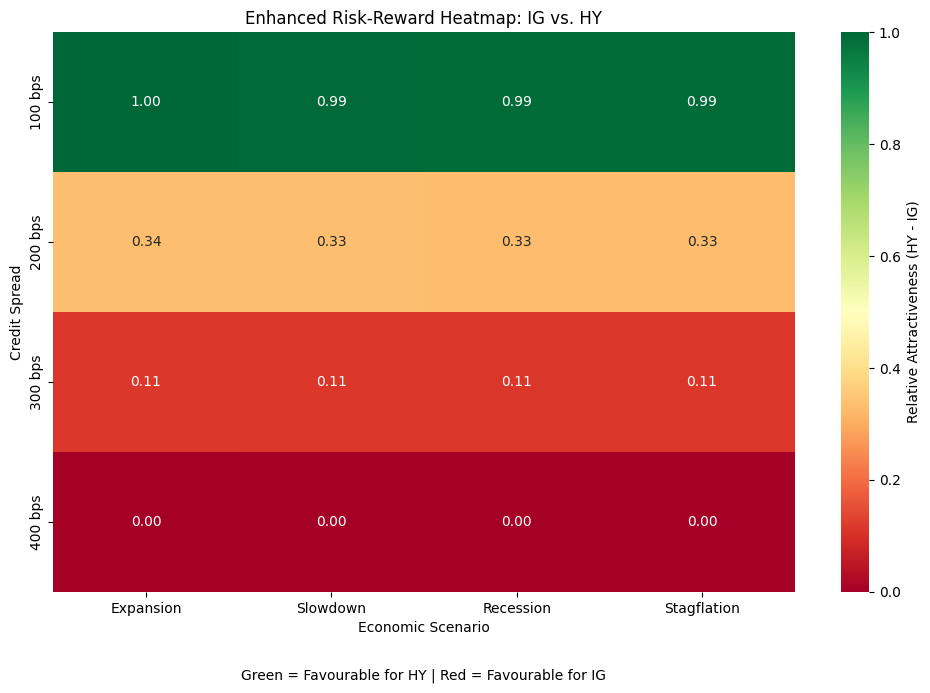

In [10]:
# Example inputs (real values should be fetched from a data source)
default_probs = {"HY": 0.03, "IG": 0.001}  # Default probabilities for HY and IG
loss_given_default = 0.6  # Assume 60% loss given default

def calculate_expected_return(yield_, default_prob):
    return yield_ - (default_prob * loss_given_default)

# Enhanced heatmap calculation
data_enhanced = []
for spread in credit_spreads:
    row = []
    for scenario in scenarios:
        # Example yield assumptions (real data needed)
        hy_yield = spread / 100 + 6  # HY yield (bps spread + base yield)
        ig_yield = spread / 100 + 2  # IG yield (bps spread + base yield)

        if scenario == "Expansion":
            hy_return = calculate_expected_return(hy_yield, default_probs["HY"])
            ig_return = calculate_expected_return(ig_yield, default_probs["IG"])
        elif scenario == "Slowdown":
            hy_return = calculate_expected_return(hy_yield, default_probs["HY"] * 1.5)
            ig_return = calculate_expected_return(ig_yield, default_probs["IG"] * 1.5)
        elif scenario == "Recession":
            hy_return = calculate_expected_return(hy_yield, default_probs["HY"] * 2)
            ig_return = calculate_expected_return(ig_yield, default_probs["IG"] * 2)
        elif scenario == "Stagflation":
            hy_return = calculate_expected_return(hy_yield, default_probs["HY"] * 1.8)
            ig_return = calculate_expected_return(ig_yield, default_probs["IG"] * 1.2)

        # Reward-to-risk ratio (example risk metric)
        hy_risk = spread / 200  # Assume HY risk scales with spread
        ig_risk = spread / 400  # Assume IG risk scales slower

        hy_score = hy_return / hy_risk
        ig_score = ig_return / ig_risk

        # Relative attractiveness (higher score = more attractive)
        row.append(hy_score - ig_score)
    data_enhanced.append(row)

# Normalize the enhanced data for visualization
data_enhanced = np.array(data_enhanced)
normalized_data_enhanced = (data_enhanced - np.min(data_enhanced)) / (np.max(data_enhanced) - np.min(data_enhanced))

# Visualize the normalized data as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    normalized_data_enhanced,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    xticklabels=scenarios,
    yticklabels=[f"{spread} bps" for spread in credit_spreads],
    cbar_kws={'label': 'Relative Attractiveness (HY - IG)'}
)

plt.title("Enhanced Risk-Reward Heatmap: IG vs. HY")
plt.text(0.5, -0.15, "Green = Favourable for HY | Red = Favourable for IG",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel("Economic Scenario")
plt.ylabel("Credit Spread")
plt.tight_layout()
plt.savefig("risk_reward_heatmap_enhanced.png")
plt.show()